# Data Exploration

In this notebook we will be exploring both of our datasets:

 - **bidders** dataset, which is located in train.csv.
 - **bids** dataset, which is located in bids.csv.
 
Let's start with the shortest one: **Bidders**

## Bidders exploratory analysis

### Loading the dataset

Let's start by loading the dataset in a Pandas' dataframse.

**NOTE**: We expect all the relevant files to be located in `../data`.

In [1]:
import pandas as pd

# Change accordingly.
bidders_file_path = "../data/train.csv"

bidders_dataframe = pd.read_csv(bidders_file_path)

sample_size = 10

# Let's start by taking a small sample
bidders_dataframe.sample(n=sample_size)

,bidder_id,payment_account,address,outcome
205,ea0e5f7d93f2220a62bde8067f26daaa7oxgf,a3d2de7675556553a5f08e4c88d2c2289e2xv,a3d2de7675556553a5f08e4c88d2c228gz3ts,0.0
1490,8df5d645ed4040b857c121a4459b7976n5u3b,a3d2de7675556553a5f08e4c88d2c2282nldm,a3d2de7675556553a5f08e4c88d2c228ylx9v,0.0
731,86151544b29ad273209ec4605c257b089z588,9b2f29c3f79f34bfb00047bafb3dbac2i77pw,728e4463ce7229a4e030f83de9fb2850shfce,0.0
907,85499f83c5f1674c87d0fe77838c4da793u8y,a3d2de7675556553a5f08e4c88d2c228439x8,a3d2de7675556553a5f08e4c88d2c228phyu2,0.0
1323,1680b6a12fdc8c64645c00ae8048f99c6uzoz,a3d2de7675556553a5f08e4c88d2c228zdl54,3ba3506ae850ba0e2240467765df9000mxdfm,0.0
1056,465c4f2ad08cc1e5f7a5e1e3ac75654ealh0g,5e943e479c2e8d6dd4c8b8a587a7c061vcrk2,a3d2de7675556553a5f08e4c88d2c228dabaw,0.0
1119,69d8fbf99586bfaac64d31f82b9bee27wltkd,ba334c6af3fec88474f065db97d89e82e691g,bd8f9b821f1d15cbca10df5a6be37365fvnpj,0.0
1630,af50d549e86276f034e52037722dd5aetouu2,7f4dcb867dd7b9ca267017784cd2fa83ag2s1,17ffcc26292232ea2643792d8f08af8bma90q,0.0
1906,4089a2b7f26e5c13a7f3350bd52ebf8fh21nm,998270aa4847014ba6020fa528d15119fxkp8,b312117de5aeb80a49c753f562c4b2d32jogp,0.0
700,33189c09ca7067834fd25a54920f82d4nd7a4,a3d2de7675556553a5f08e4c88d2c228ppzkd,4d90f2e709f1fc0810e5aef472dd3935ehy1w,1.0


As we can see above, all the relevant fields (besides outcome) are obfuscated. 

This doesn't mean they won't be useful for our model, but surely make things a bit harder to interpret for us.

### Descriptive statistics

In [2]:
# Totals
total_bidders = len(bidders_dataframe)
number_of_human_bidders = len(bidders_dataframe[bidders_dataframe['outcome'] == 0.0])
number_of_bot_bidders = total_bidders - number_of_human_bidders

# Proportions
human_bidders_proportion = number_of_human_bidders / total_bidders
bot_bidders_proportion = number_of_bot_bidders / total_bidders

# Statistics
print("Number of total bidders: {:,}".format(total_bidders))
print("Number of human bidders: {:,}".format(number_of_human_bidders))
print("Number of bot bidders: {:,}".format(number_of_bot_bidders))
print("Proportion of human bidders: {:.2%}".format(human_bidders_proportion))
print("Proportion of bot bidders: {:.2%}".format(bot_bidders_proportion))

Number of total bidders: 2,013
Number of human bidders: 1,910
Number of bot bidders: 103
Proportion of human bidders: 94.88%
Proportion of bot bidders: 5.12%


The first thing we notice is that our dataset is highly unbalanced, where 1910 out of 2013 records represent human bidders (94.88%), whereas only a small percentage (5.12%) of the bidders were flagged as bots (103 out of 2013).

For a better understanding of this situation, let's visualize it:

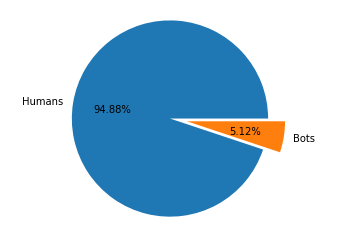

In [3]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()

# Pie chart parameters
pie_data = [number_of_human_bidders, number_of_bot_bidders]
pie_labels = ('Humans', 'Bots')
pie_labels_explode_coefficients = (0, 0.175)

# Show the chart
ax.pie(pie_data, labels=pie_labels, autopct='%1.2f%%', shadow=False, explode=pie_labels_explode_coefficients)
plt.axis('equal')
plt.show()

___

## Bids exploratory analysis

Let's now proceed to explore the **bids** dataset.

**NOTE**: We expect all the relevant files to be located in `../data`.

In [4]:
# Change accordingly.
bids_file_path = "../data/bids.csv"

bids_dataframe = pd.read_csv(bids_file_path)

sample_size = 10

# Let's start by taking a small sample
bids_dataframe.sample(n=sample_size)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
822052,822052,551a480d83ce94188b11aac799c7ac27y6qlm,xym5u,mobile,phone319,9763942842105263,bd,69.90.92.141,vasstdc27m7nks3
4886761,4886761,8c33cf751b05ca6a9d886a379a84a2ees9jlu,u077v,mobile,phone65,9644092684210526,au,162.8.52.8,vasstdc27m7nks3
2841316,2841316,759b348d21e1f20ce55471813acba5ebm43ch,gb2b8,sporting goods,phone223,9634071210526315,id,145.31.36.19,5ze87bqtzaekdex
669825,669825,a1f098bf4b0591c08ee404ed930a50feqd28q,jefix,mobile,phone358,9763186263157894,in,1.50.44.155,6w0jb05qs7evq7m
7577837,7577837,03aafab9868455b78f0723eda86698ba9v9rm,fuuhp,mobile,phone57,9708863421052631,in,237.214.80.129,oqknoadbcbcm6so
4645962,4645962,6713e820273f591bdff7d26a48ee30c5k4iii,po2k2,jewelry,phone805,9642471894736842,id,188.211.116.106,2ebcnfum29agpbc
3524485,3524485,0a0e1973ea3cba47f33b0166e9abbb4c5ndpa,opnq4,sporting goods,phone65,9637182368421052,ng,34.199.146.75,vasstdc27m7nks3
7274327,7274327,dd2d17efc6c340d5a9bd314b9aedbed3l5w1x,jqx39,jewelry,phone828,9707173157894736,in,246.49.136.28,vasstdc27m7nks3
5353732,5353732,e0a4d3ced1f96d4fce501346e847b0b5di5rs,v1zxa,jewelry,phone327,9695991842105263,in,198.125.69.142,0y0tpfifagl5yme
3908781,3908781,06a58d4af0fe7ee15324b0e921e8de1260vef,0t54p,mobile,phone2,9639707421052631,br,150.189.147.151,ftex3k6tspvl7wy


As we can see above, fields such as time, bidder_id, auction, device and url are obfuscated. 

This doesn't mean they won't be useful for our model, but surely make things a bit harder to interpret for us.

### Descriptive statistics

In [5]:
# Totals
total_bids = len(bids_dataframe)
total_auctions = len(set(bids_dataframe['auction']))
total_bidders_in_bids_dataframe = len(set(bids_dataframe['bidder_id']))
total_devices = len(set(bids_dataframe['device']))
total_countries = len(set(bids_dataframe['country']))
total_ips = len(set(bids_dataframe['ip']))
total_urls = len(set(bids_dataframe['url']))
total_merchandise_categories = len(set(bids_dataframe['merchandise']))

print("Number of bids: {:,}".format(total_bids))
print("Number of auctions: {:,}".format(total_auctions))
print("Number of total bidders in bids dataset: {:,}".format(total_bidders_in_bids_dataframe))
print("Number of devices: {:,}".format(total_devices))
print("Number of countries: {:,}".format(total_countries))
print("Number of IPs: {:,}".format(total_ips))
print("Number of URLs: {:,}".format(total_urls))
print("Number of merchandise categories: {:,}".format(total_merchandise_categories))

Number of bids: 7,656,334
Number of auctions: 15,051
Number of total bidders in bids dataset: 6,614
Number of devices: 7,351
Number of countries: 200
Number of IPs: 2,303,991
Number of URLs: 1,786,351
Number of merchandise categories: 10


In [23]:
# Averages

data_per_auction_per_user = bids_dataframe.groupby(['auction', 'bidder_id'])
data_per_user = bids_dataframe.groupby(['bidder_id'])
mean_bids_per_user = data_per_user['bid_id'].count().mean()
median_bids_per_user = data_per_user['bid_id'].count().median()
mode_bids_per_user = data_per_user['bid_id'].count().mode()

print(data_per_auction_per_user['auction'].describe())
print("Average number of bids per user: {}".format(mean_bids_per_user))
print("Median of bids per user: {}".format(median_bids_per_user))
print("Mode of bids per user: {}".format(mode_bids_per_user[0]))
print("User with more bids: {}".format(data_per_user['bid_id'].count().max()))

KeyboardInterrupt: 